<a href="https://colab.research.google.com/github/gilbert83416/NTUST-AI-Master-degree-Reference/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df['ans'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
#list [Q90, Q10, A90, A10]
x_train, x_test, y_train, y_test = train_test_split(np.array(iris["data"]),
                                                    np.array(iris["target"]),
                                                    test_size = 0.1)
x_train, x_test, y_train, y_test

(array([[5.8, 2.8, 5.1, 2.4],
        [5.6, 2.7, 4.2, 1.3],
        [6.7, 3.1, 4.4, 1.4],
        [6.3, 2.5, 5. , 1.9],
        [6.4, 3.2, 4.5, 1.5],
        [5.7, 3. , 4.2, 1.2],
        [5.5, 4.2, 1.4, 0.2],
        [5.1, 3.8, 1.9, 0.4],
        [6.3, 2.8, 5.1, 1.5],
        [6.7, 3. , 5.2, 2.3],
        [5. , 3.6, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [6.7, 3.3, 5.7, 2.1],
        [5. , 3.2, 1.2, 0.2],
        [4.3, 3. , 1.1, 0.1],
        [5.4, 3.9, 1.3, 0.4],
        [4.9, 3. , 1.4, 0.2],
        [5.5, 2.6, 4.4, 1.2],
        [5.8, 2.7, 5.1, 1.9],
        [4.6, 3.4, 1.4, 0.3],
        [7.7, 2.6, 6.9, 2.3],
        [5.9, 3. , 5.1, 1.8],
        [4.9, 2.4, 3.3, 1. ],
        [6.4, 3.1, 5.5, 1.8],
        [6.5, 3.2, 5.1, 2. ],
        [4.8, 3. , 1.4, 0.1],
        [4.8, 3. , 1.4, 0.3],
        [5.5, 2.4, 3.7, 1. ],
        [5.2, 2.7, 3.9, 1.4],
        [6.1, 2.8, 4.7, 1.2],
        [7.1, 3. , 5.9, 2.1],
        [5.4, 3. , 4.5, 1.5],
        [7.2, 3.2, 6. , 1.8],
        [6

In [ ]:
#2決策樹：binary 二項式 /(train ->fit)
#decision tree: front/backward, and sklearn only support backward -> max_depth
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(312.48, 634.1999999999999, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [43, 45, 47]\nclass = virginica'),
 Text(156.24, 380.52, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(468.72, 380.52, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 92\nvalue = [0, 45, 47]\nclass = virginica'),
 Text(312.48, 126.84000000000003, 'gini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(624.96, 126.84000000000003, 'gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]\nclass = virginica')]

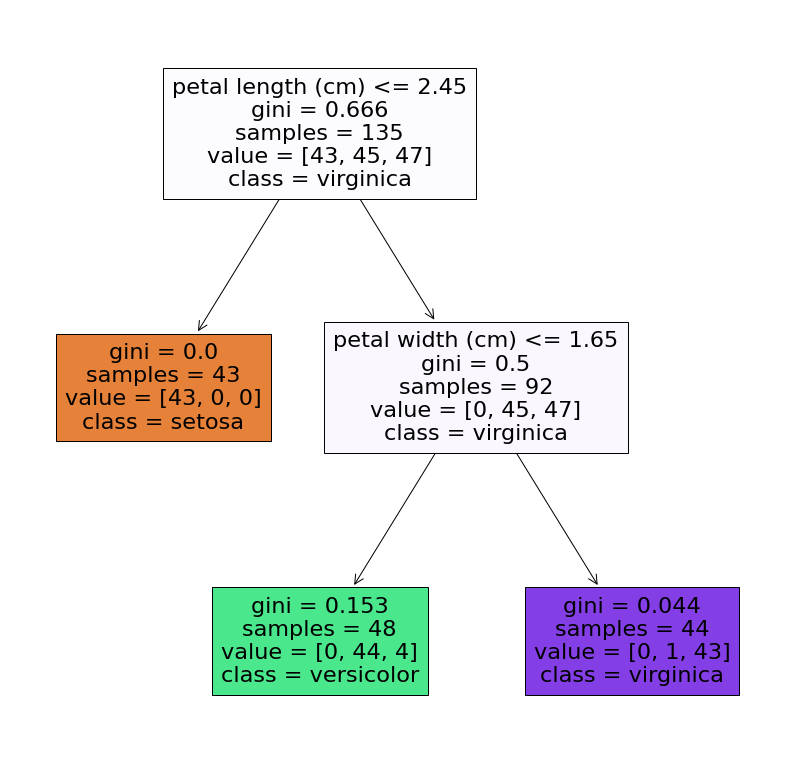

In [ ]:
#sklearn.tree.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)
# from sklearn.tree import export_graphviz
#3Gini係數= wrong Pi
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf, feature_names = iris["feature_names"], class_names = iris["target_names"], filled = True)


In [ ]:
#log ab = log a+ log b, log a/b = log a - log b
#4可解釋性
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

0.9333333333333333